In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [3]:
df = pd.read_csv('train_data_processed.csv')
df_test = pd.read_csv('test_data_processed.csv')

df.head()


,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,...,subject_B,subject_C,subject_D,subject_F,subject_G,subject_H,subject_I,subject_K,subject_L,subject_M
0,1,-323.106605,2.694366,-1.987520,261.092784,0.013704,0.000100,-8.900000e-06,-0.806753,-0.805752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,-376.084691,0.969696,-6.933765,355.311648,0.030292,-0.000153,8.830000e-07,-0.940358,-0.937867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,91.955425,2.621643,-2.581162,51.357206,0.036668,-0.000104,-9.220000e-05,0.240181,0.229315,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,-391.814586,1.866914,-2.510799,382.900317,0.007947,-0.000028,2.990000e-05,-0.978424,-0.977094,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,-363.823732,2.951346,-3.726368,330.527539,0.010074,-0.000004,-2.060000e-05,-0.915454,-0.907291,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
numerical_columns = [col for col in df.columns if not any(keyword in col for keyword in ['subject', 'state', 'phase', 'output'])]

print(f"Numerical columns identified by name: {numerical_columns}")

Numerical columns identified by name: ['x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x82', 'x83', 'x84', 'x85', 'x88', 'x89', 'x90', 'x94', 'x95', 'x100', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x135', 'x136', 'x137', 'x138', 'x139', 'x140', 'x141', 'x142', 'x143', 'x144', 'x145', 'x146', 'x147', 'x148', 'x149', 'x150', 'x151', 'x152', 'x153', 'x

### Model 0: Logistic Regression

#### Step 1: Pre-process the data

This steps includes:

1. Standardizing the features

In [11]:
def preprocess_dataframe(df, is_train=True):
    """
    This function preprocesses the dataframe 
    by performing feature normalization, 
    one-hot encoding, 
    and handling ordinal features.
    """
    df = df.copy()

    ordinal_features = ['phase']
    target_feature = ['output']

    # numerical features
    numerical_features = [col for col in df.columns if not any(keyword in col for keyword in ['subject', 'state', 'phase', 'output'])]

    # Perform feature Normalization for numerical features
    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    # handle ordinal features
    df['phase'] = df['phase'].astype(int)

    # print the shape of the dataframe after preprocessing
    if is_train:
        print(f"Shape of the training dataframe after preprocessing: {df.shape}")
    else:
        print(f"Shape of the testing dataframe after preprocessing: {df.shape}")

    return df


df_train = preprocess_dataframe(df, is_train=True)
df_test_final= preprocess_dataframe(df_test, is_train=False)



Shape of the training dataframe after preprocessing: (4584, 619)
Shape of the testing dataframe after preprocessing: (1732, 618)


In [12]:
df_train.describe()

,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,...,subject_B,subject_C,subject_D,subject_F,subject_G,subject_H,subject_I,subject_K,subject_L,subject_M
count,4.584000e+03,4.584000e+03,4.584000e+03,4.584000e+03,4.584000e+03,4.584000e+03,4.584000e+03,4.584000e+03,4.584000e+03,4.584000e+03,...,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000
mean,-1.627552e-16,-1.054034e-16,-6.975223e-17,-1.414420e-16,-1.193538e-16,-4.030129e-17,-2.325074e-18,-1.550050e-18,3.255104e-17,4.960159e-17,...,0.111911,0.078752,0.091623,0.071990,0.113002,0.039485,0.144634,0.102094,0.096859,0.066754
std,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,...,0.315291,0.269381,0.288525,0.258499,0.316629,0.194767,0.351769,0.302805,0.295797,0.249623
min,-1.292197e+00,-1.246626e+00,-1.783631e+00,-3.941441e+00,-1.721348e+00,-6.077269e-01,-8.479520e+00,-1.399205e+01,-1.249734e+00,-1.246626e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.292197e+00,-6.900080e-01,-8.620167e-01,-5.530060e-01,-9.832858e-01,-5.130698e-01,-1.632125e-01,-1.901259e-01,-6.830851e-01,-6.900080e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.738759e-01,-4.947626e-01,-1.950541e-01,3.582130e-01,4.031610e-01,-3.698656e-01,1.426430e-02,-1.250713e-02,-5.007394e-01,-4.947626e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.738759e-01,5.681348e-01,8.225181e-01,7.071989e-01,7.944663e-01,3.114186e-02,1.857052e-01,1.595233e-01,5.717859e-01,5.681348e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.738759e-01,4.198039e+00,2.245901e+00,2.935823e+00,2.269990e+00,1.525241e+01,7.608531e+00,2.867860e+01,4.178483e+00,4.198039e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Step 2: Handling class imbalance

The dataset has 84.5% of observations belonging to `class=1` vs 15.5% for `class=0`. 

Techniques to use:

Class Weights: Assign higher weights to the minority class.

Resampling:

Oversampling: SMOTE, ADASYN.

Undersampling: Random undersampling.

In [13]:
from sklearn.utils import class_weight
import numpy as np

# Calculate class weights
classes = np.unique(df_train['output'])
class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=df_train['output'])
class_weights_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weights_dict)


Class Weights: {0: 3.2236286919831225, 1: 0.5917893106119287}


#### Splitting the data into training and validation sets

In [14]:
from sklearn.model_selection import train_test_split

X = df_train.drop('output', axis=1)
y = df_train['output']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}")


Train shape: (3208, 618), Validation shape: (1376, 618)


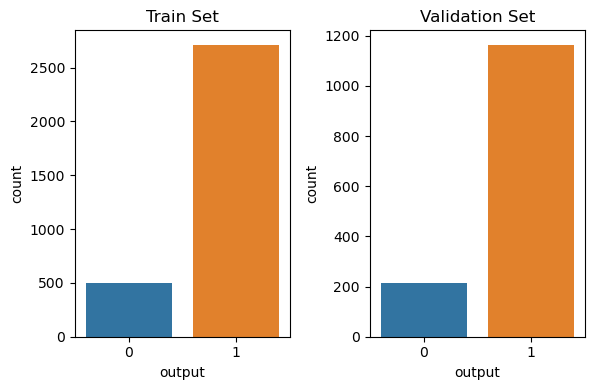

In [15]:
# plot the distribution of the target variable in the training, validation, and test sets
plt.figure(figsize=(9, 4))

plt.subplot(1, 3, 1)
sns.countplot(x='output', data=pd.DataFrame({'output': y_train}))
plt.title('Train Set')

plt.subplot(1, 3, 2)

sns.countplot(x='output', data=pd.DataFrame({'output': y_val}))
plt.title('Validation Set')

plt.tight_layout()
plt.show()




#### Logistic Regression with Regularization

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the base model
logreg = LogisticRegression(
    class_weight=class_weights_dict,
    random_state=42,
    max_iter=10000
)


# Define hyperparameters for regularization
param_grid = {
    'penalty': ['l1'],
    'C': [0.01, 0.1, 0.5, 1, 10, 100],
    'solver': ['saga']
}

# Setup GridSearch with cross-validation
grid_search_logreg = GridSearchCV(
    logreg,
    param_grid,
    cv=5,
    scoring='accuracy',  # Use ROC AUC due to class imbalance
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search_logreg.fit(X_train, y_train)

print(f"Best parameters: {grid_search_logreg.best_params_}")
print(f"Best ROC AUC: {grid_search_logreg.best_score_}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best ROC AUC: 0.8008559021953856


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Extract results from grid search
results = grid_search_logreg.cv_results_ # returns a dictionary


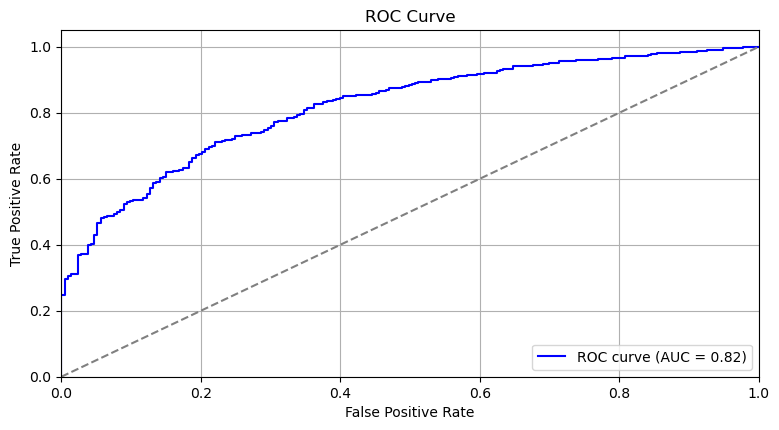

In [21]:
from sklearn.metrics import roc_curve, auc

# Get the best model
best_model = grid_search_logreg.best_estimator_

# Predict probabilities
y_val_probs = best_model.predict_proba(X_val)[:, 1]  # Get the probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(9, 4.5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


#### Model Evaluation

Validation ROC AUC: 0.8172082076869357
              precision    recall  f1-score   support

           0       0.35      0.70      0.46       213
           1       0.93      0.76      0.84      1163

    accuracy                           0.75      1376
   macro avg       0.64      0.73      0.65      1376
weighted avg       0.84      0.75      0.78      1376



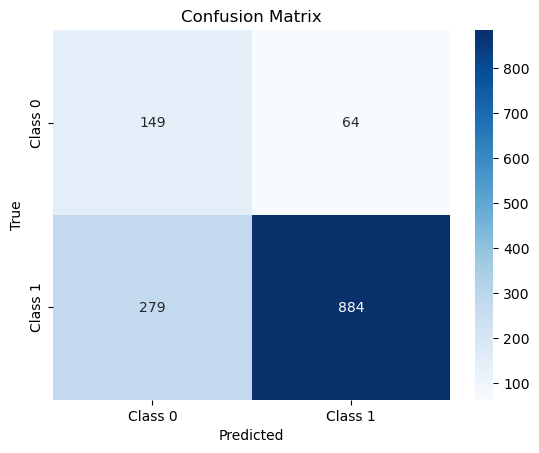

In [22]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

roc_auc = roc_auc_score(y_val, y_val_probs)
print(f"Validation ROC AUC: {roc_auc}")

# Predict classes
y_val_pred = best_model.predict(X_val)

# Classification report
print(classification_report(y_val, y_val_pred))

# plot the confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



### Submission Attempt 1 with Baseline Regularized Logistic (Kaggle Score: 0.61132)

In [23]:
df_test_final.head()

,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,...,subject_B,subject_C,subject_D,subject_F,subject_G,subject_H,subject_I,subject_K,subject_L,subject_M
0,0.866755,1.825263,-1.326518,-2.815176,-1.774081,-0.592839,0.011750,-0.271809,1.817029,1.825263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.153729,-0.777866,-0.715694,-1.261877,1.026349,1.818062,0.463322,-0.719211,-0.734575,-0.777866,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.866755,-0.665480,-0.813956,-0.904775,0.735410,-0.553891,0.047395,-0.089080,-0.662559,-0.665480,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.866755,-0.419240,-0.989989,-0.617779,0.258181,-0.543438,-0.076962,0.080697,-0.415058,-0.419240,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.866755,1.835486,-1.179244,0.003942,-1.773789,-0.604890,0.007462,-0.019498,1.827381,1.835486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# make predictions on the test set
y_test_pred = best_model.predict(df_test_final)
y_test_pred

# create a submission file
submission = pd.DataFrame({
    'id': df_test_final.index,
    'output': y_test_pred
})

assert submission.shape[0] == df_test_final.shape[0]

# # save the submission file to a csv
submission.to_csv('submission_Baseline_Logistic_Regularized_2.csv', index=False)


[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=  10.2s
[CV] END .....................C=0.5, penalty=l1, solver=saga; total time=  40.0s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=  55.8s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=  10.3s
[CV] END .....................C=0.5, penalty=l1, solver=saga; total time=  49.0s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=  49.3s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   6.3s
[CV] END .....................C=0.5, penalty=l1, solver=saga; total time=  49.1s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=  56.9s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   9.9s
[CV] END .....................C=0.5, penalty=l1, solver=saga; total time=  49.8s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=  56.0s
[CV] END ...................

### Submission Attempt 2: With an adjusted threshold aiming for Highest Accuracy (kaggle Score: 0.54091)

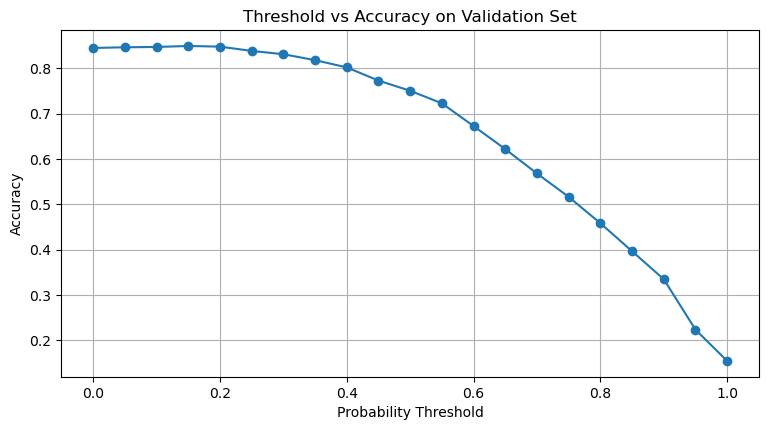

In [31]:
y_probs = best_model.predict_proba(X_val)[:, 1]

# Define the range of thresholds you want to test
thresholds = np.arange(0.0, 1.05, 0.05)  # Thresholds from 0.0 to 1.0 in increments of 0.05

# Initialize a list to store accuracy values
accuracy_scores = []

# Loop through each threshold and calculate accuracy
for threshold in thresholds:
    # Apply the threshold to get binary predictions
    y_pred_adjusted = (y_probs >= threshold).astype(int)
    
    # Calculate accuracy for this threshold
    accuracy = accuracy_score(y_val, y_pred_adjusted)
    
    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)

# Plot the threshold values against accuracy scores
plt.figure(figsize=(9, 4.5))
plt.plot(thresholds, accuracy_scores, marker='o')
plt.title('Threshold vs Accuracy on Validation Set')
plt.xlabel('Probability Threshold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [35]:
best_threshold = thresholds[np.argmax(accuracy_scores)]

# Get predicted probabilities for the test set
y_test_prob = best_model.predict_proba(df_test_final)[:, 1]

# Apply the best threshold to generate class predictions
y_test_pred = (y_test_prob >= best_threshold).astype(int)

# Create a submission file with predicted class values
submission = pd.DataFrame({
    'id': df_test_final.index,
    'output': y_test_pred       # The class predictions (0 or 1)
})

# Ensure the submission matches the test set size
assert submission.shape[0] == df_test_final.shape[0]

# Save the submission file to a CSV
submission.to_csv('submission_Baseline_Logistic_Regularized_w_Threshold.csv', index=False)

print("Submission file with class values created successfully!")

Submission file with class values created successfully!


In [36]:
print(f"Best Threshold {best_threshold}")

Best Threshold 0.15000000000000002


### Submission Attempt 3: With an adjusted threshold aiming for Highest ROC_AUC Score (Kaggle Score: 0.63976)

Best threshold based on validation ROC AUC: 0.55


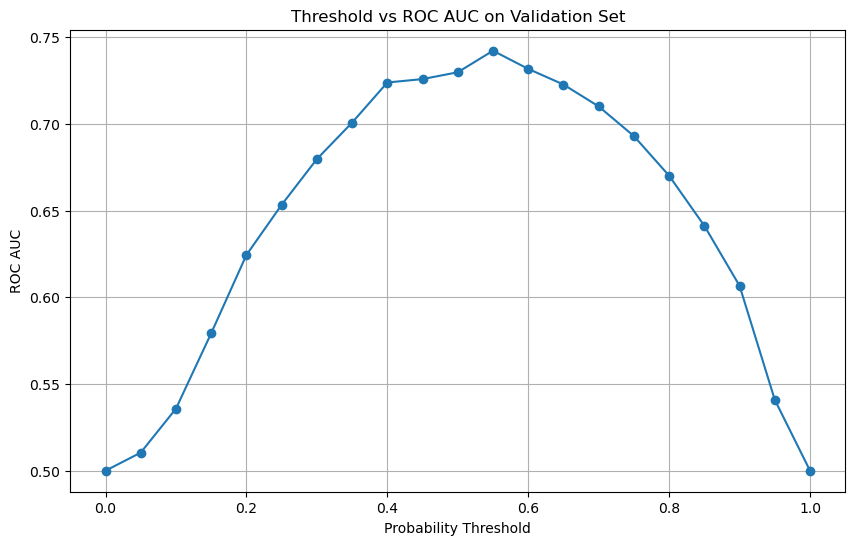

In [37]:
# Get the predicted probabilities (for class 1) on the validation set
y_prob = best_model.predict_proba(X_val)[:, 1]

# Define the range of thresholds you want to test
thresholds = np.arange(0.0, 1.05, 0.05)

# Initialize a list to store ROC AUC values
roc_auc_scores = []

# Loop through each threshold and calculate ROC AUC
for threshold in thresholds:
    # Apply the threshold to get binary predictions
    y_pred_adjusted = (y_prob >= threshold).astype(int)
    
    # Calculate ROC AUC for this threshold
    roc_auc = roc_auc_score(y_val, y_pred_adjusted)
    
    # Append the ROC AUC score to the list
    roc_auc_scores.append(roc_auc)

# Find the best threshold based on maximum ROC AUC
best_threshold = thresholds[np.argmax(roc_auc_scores)]
print(f"Best threshold based on validation ROC AUC: {best_threshold}")

# Plot the threshold values against ROC AUC scores
plt.figure(figsize=(10, 6))
plt.plot(thresholds, roc_auc_scores, marker='o')
plt.title('Threshold vs ROC AUC on Validation Set')
plt.xlabel('Probability Threshold')
plt.ylabel('ROC AUC')
plt.grid(True)
plt.show()

Best threshold based on validation ROC AUC: 0.55


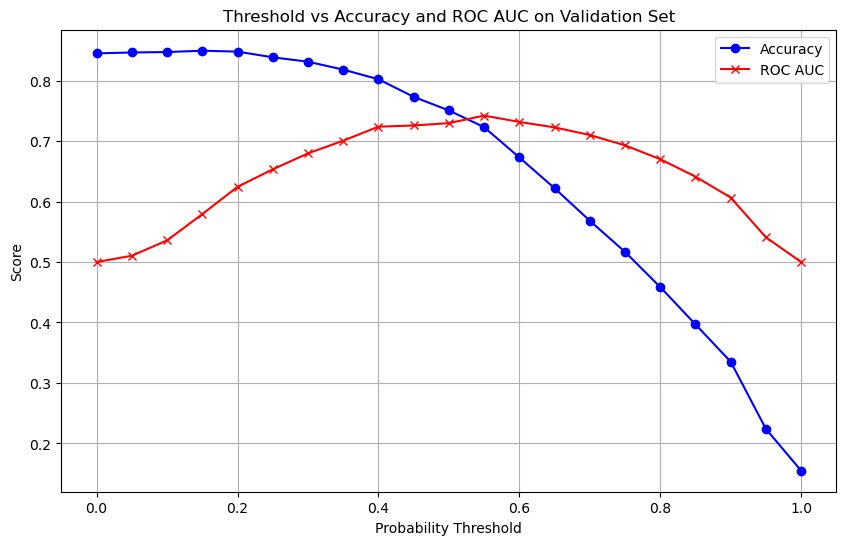

In [38]:
# Define the range of thresholds you want to test
thresholds = np.arange(0.0, 1.05, 0.05)

# Initialize lists to store Accuracy and ROC AUC values
accuracy_scores = []
roc_auc_scores = []

# Loop through each threshold and calculate both Accuracy and ROC AUC
for threshold in thresholds:
    # Apply the threshold to get binary predictions
    y_pred_adjusted = (y_prob >= threshold).astype(int)
    
    # Calculate Accuracy for this threshold
    accuracy = accuracy_score(y_val, y_pred_adjusted)
    accuracy_scores.append(accuracy)
    
    # Calculate ROC AUC for this threshold
    roc_auc = roc_auc_score(y_val, y_pred_adjusted)
    roc_auc_scores.append(roc_auc)

# Find the best threshold based on maximum ROC AUC
best_threshold = thresholds[np.argmax(roc_auc_scores)]
print(f"Best threshold based on validation ROC AUC: {best_threshold}")

# Plot the threshold values against Accuracy and ROC AUC scores
plt.figure(figsize=(10, 6))

# Plot Accuracy
plt.plot(thresholds, accuracy_scores, label='Accuracy', marker='o', color='blue')

# Plot ROC AUC
plt.plot(thresholds, roc_auc_scores, label='ROC AUC', marker='x', color='red')

# Add labels and title
plt.title('Threshold vs Accuracy and ROC AUC on Validation Set')
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [40]:
# Find the best threshold based on maximum ROC AUC
best_threshold_index = np.argmax(roc_auc_scores)
best_threshold = thresholds[best_threshold_index]
print(f"Best threshold based on validation ROC AUC: {best_threshold}")

# Calculate and print the ROC AUC and accuracy for the best threshold
y_pred_best_threshold = (y_prob >= best_threshold).astype(int)
best_threshold_roc_auc = roc_auc_score(y_val, y_pred_best_threshold)
best_threshold_accuracy = accuracy_score(y_val, y_pred_best_threshold)

print(f"ROC AUC for best threshold ({best_threshold}): {best_threshold_roc_auc}")
print(f"Accuracy for best threshold ({best_threshold}): {best_threshold_accuracy}")

# Now calculate for the default threshold of 0.5
y_pred_default = (y_prob >= 0.5).astype(int)
default_threshold_roc_auc = roc_auc_score(y_val, y_pred_default)
default_threshold_accuracy = accuracy_score(y_val, y_pred_default)

print(f"ROC AUC for default threshold (0.5): {default_threshold_roc_auc}")
print(f"Accuracy for default threshold (0.5): {default_threshold_accuracy}")

Best threshold based on validation ROC AUC: 0.55
ROC AUC for best threshold (0.55): 0.7422422179970047
Accuracy for best threshold (0.55): 0.7231104651162791
ROC AUC for default threshold (0.5): 0.729816848929634
Accuracy for default threshold (0.5): 0.7507267441860465


In [41]:

# Now use the best threshold to make predictions on the test set
y_test_prob = best_model.predict_proba(df_test_final)[:, 1]

# Apply the best threshold to generate class predictions
y_test_pred = (y_test_prob >= best_threshold).astype(int)

# Create a submission file with predicted class values
submission = pd.DataFrame({
    'id': df_test_final.index,  
    'output': y_test_pred       # The class predictions (0 or 1)
})

# Ensure the submission matches the test set size
assert submission.shape[0] == df_test_final.shape[0]

# Save the submission file to a CSV
submission.to_csv('submission_Baseline_Logistic_Regularized_w_ROC_thresh.csv', index=False)

print("Submission file with class values created successfully!")

Submission file with class values created successfully!
